#### Lesson 9 Home-classwork

##### Import the table/data set from tips.csv

In [12]:
import datascience as ds
import numpy as np
import warnings
warnings.simplefilter('ignore', FutureWarning) #Gets rid of warnings
%matplotlib inline
Tips=ds.Table.read_table('tips.csv')
Tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


The tips.csv dataset contains data on tips collected from a restaurant.

a. Find the mean tip broken down by sex. On one plot, build a histogram of tips for males overlaid with a histogram of tips for females. Discuss what you found.

b. Repeat part a, but broken down by time.

##### a) find mean tip broken down by sex.

In [14]:
Tips.select("tip","sex").group("sex",np.mean) #for the group(Variable, apply function to all other columns)

sex,tip mean
Female,2.83345
Male,3.08962


Now build the histogram

C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


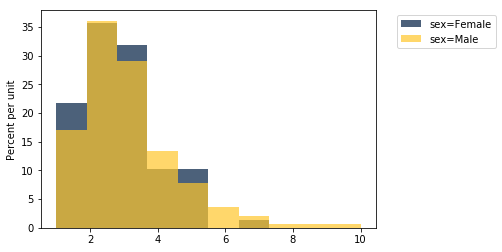

In [15]:
Tips.select("tip","sex").hist("tip",group="sex")

Discussion: Men and women are fairly similar when it comes to tipping around the same range. But there is a small percentage of men who tip around 10$. It's likely that this is an exception. Nonetheless, there is about 5 percentage more of women who tip less than 2 than that of men. 

#### b) repeat the process for a, but for time instead of sex

In [16]:
Tips.select("tip","time").group("time",np.mean) #for the group(Variable, apply function to all other columns)

time,tip mean
Dinner,3.10267
Lunch,2.72809


C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


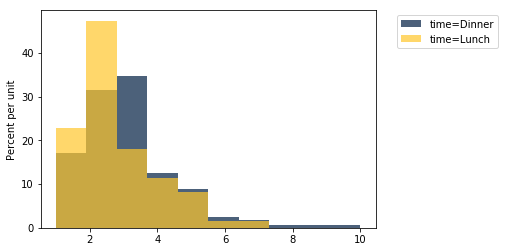

In [17]:
Tips.select("tip","time").hist("tip",group="time")

Discussion: It is evident from the historgram that more people for lunch, tip les than those who eat dinner below the 4$ tip category. After that, the differences are slim.

Create a function called weekday_to_num. This function inputs a string denoting day of
the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues =
2, … Sun = 7).

In [2]:
def weekday_to_num(day_of_week):
    #It's important to note that python doesn't have switch statements, so this is the best we got...
    switch={
        "Mon": 1,
        "Tue": 2,
        "Wed": 3,
        "Thur":4,
        "Fri": 5,
        "Sat": 6,
        "Sun": 7       
    }
    return switch.get(day_of_week,"false")

In [3]:
#Quick check
weekday_to_num("Mon")

1

Apply this function to the day column of tips and include the result as a new column in
tips, called weekday_num.

In [36]:
Tips.with_column("weekday_num",Tips.apply(weekday_to_num,"day"))

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


Create a function called est_tip. The goal of this function is to predict tip amount
based on the value of the bill (total_bill). To do this, we will look at “nearby” values
(i.e. tip, where the value of total_bill is near the value of interest.) For example, if
we want to predict the tip for total bill value of 20D, we will simply look at all total bills
near 20D and average the tip amount. The input of est_tip should be the total bill
amount and the window, or the difference in total bill we would consider “nearby”. For
example, for a window of $1$, we will look at all bills totaling $19$ thru $21$. The output of
this function will be the predicted tip amount.

In [62]:
def est_tip(total_bill,window):
    Range=Tips.where('total_bill', ds.are.above(total_bill-window)).where('total_bill', ds.are.below(total_bill+window)) #establishes total bills in window
    return sum(Range.column('tip'))/Range.num_rows                 

Apply this function to the total_bill column of tips and include the result as a new
column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip
amount.

In [66]:
Tips=Tips.with_column("Predicted_tip",Tips.apply(lambda x: est_tip(x,1),"total_bill"))
#applies lambda function (only applicable within that specific line and no where else)
Tips

total_bill,tip,sex,smoker,day,time,size,Predicted_tip
16.99,1.01,Female,No,Sun,Dinner,2,2.82437
10.34,1.66,Male,No,Sun,Dinner,3,1.81136
21.01,3.5,Male,No,Sun,Dinner,3,3.3425
23.68,3.31,Male,No,Sun,Dinner,2,3.33867
24.59,3.61,Female,No,Sun,Dinner,4,3.56267
25.29,4.71,Male,No,Sun,Dinner,4,4.19909
8.77,2,Male,No,Sun,Dinner,2,1.865
26.88,3.12,Male,No,Sun,Dinner,4,3.48111
15.04,1.96,Male,No,Sun,Dinner,2,2.426
14.78,3.23,Male,No,Sun,Dinner,2,2.43833


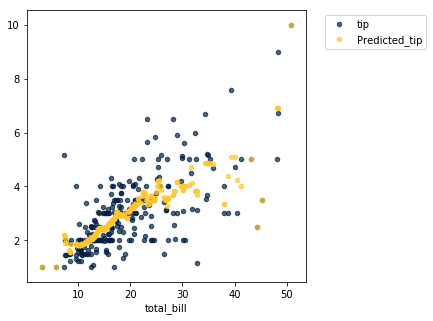

In [70]:
#Scatter plot
Tips.select('total_bill','tip','Predicted_tip').scatter('total_bill')